In [11]:
import numpy as np
from matplotlib import pyplot as plt

from prysm import thinlens, FringeZernike, Seidel, PSF, MTF
%matplotlib inline
plt.style.use('ggplot')

In [12]:
# some data to play with
# units: mm, exp give us a large ranges of log-spaced values from linspace
object_distances = np.exp(np.linspace(4, 10, 100))

# efl, fno, and pmag
efl = 20
infinite_fno = 14
pupil_mag = 2

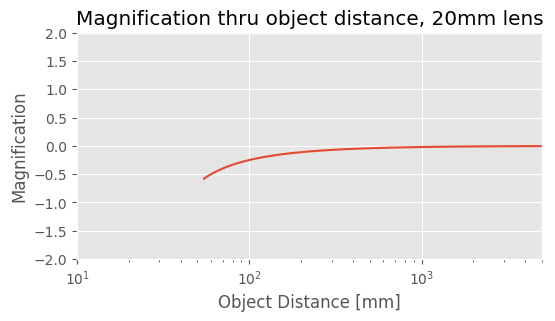

In [13]:
# magnification through object distance, blue point indicates object at 2x EFL, should have mag of -1
mags = thinlens.object_dist_to_mag(efl, object_distances)

fig, ax = plt.subplots(dpi=100, figsize=(6,3))
ax.semilogx(object_distances, mags)
ax.set(xlim=(10,5000), xlabel='Object Distance [mm]',
       ylim=(-2, 2), ylabel='Magnification',
       title='Magnification thru object distance, 20mm lens');

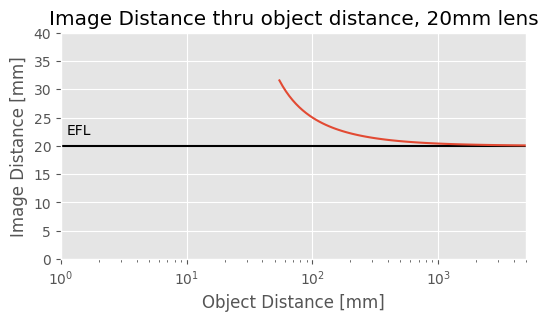

In [14]:
# image distance from object distance
image_distances = thinlens.object_to_image_dist(efl, object_distances)

fig, ax = plt.subplots(dpi=100, figsize=(6,3))
ax.semilogx(object_distances, image_distances)
ax.hlines(efl, xmin=1, xmax=1e99)
ax.text(1.1, efl+2, 'EFL')
ax.set(xlim=(1,5000), xlabel='Object Distance [mm]',
       ylim=(-0, 40), ylabel='Image Distance [mm]',
       title='Image Distance thru object distance, 20mm lens');

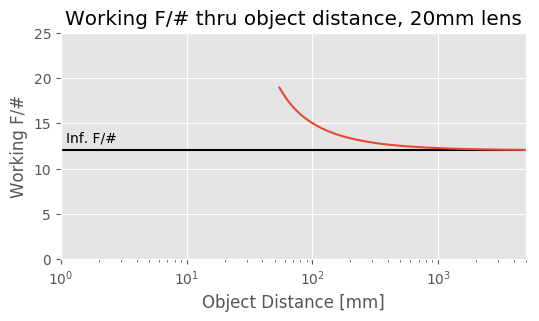

In [15]:
# f/# through object distance
inf_fno = 12
fnos = thinlens.image_dist_epd_to_fno(image_distances, efl/inf_fno)
fnos2 = thinlens.mag_to_fno(mags, inf_fno)

fig, ax = plt.subplots(dpi=100, figsize=(6,3))
ax.semilogx(object_distances, fnos)
ax.hlines(inf_fno, xmin=1, xmax=1e99)
ax.text(1.1, inf_fno+1, 'Inf. F/#')
ax.set(xlim=(1,5000), xlabel='Object Distance [mm]',
       ylim=(0, 25), ylabel='Working F/#',
       title='Working F/# thru object distance, 20mm lens');

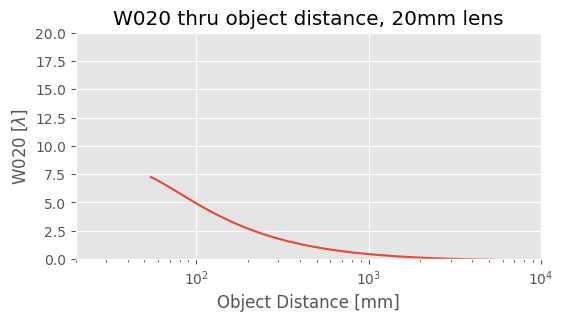

In [16]:
offset = thinlens.object_to_image_dist(efl, 3500)
image_shifts = image_distances - offset
defocuses = thinlens.image_displacement_to_defocus(image_shifts*1000, fnos, 0.55)

fig, ax = plt.subplots(dpi=100, figsize=(6,3))
ax.semilogx(object_distances, defocuses)
ax.set(xlim=(efl,10000), xlabel='Object Distance [mm]',
       ylim=(0, 20), ylabel=r'W020 [$\lambda$]',
       title='W020 thru object distance, 20mm lens');

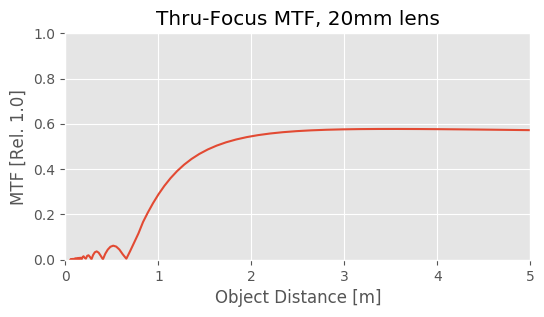

In [20]:
focus_errors = np.asarray([-500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500])

mtf50 = []
for defocus, fno in zip(defocuses, fnos):
    pup = Seidel(W020=defocus/2, epd=efl/fno)
    mtf = MTF.from_pupil(pup, efl, padding=4)
    u, t = mtf.tan
    idx = np.searchsorted(u, 50)
    mtf50.append(t[idx])
    
fig, ax = plt.subplots(dpi=100, figsize=(6,3))
ax.plot(object_distances/1e3, mtf50)
ax.set(xlim=(0, 5), xlabel='Object Distance [m]',
       ylim=(0,1), ylabel='MTF [Rel. 1.0]',
       title='Thru-Focus MTF, 20mm lens');